## Liveability index

#### This code explores the data further and develops a "liveability index" that shows how great a place will be in the future with regards to climate change

In [13]:
# import reqs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import cleaned data (will be replaced with sql commands once downstream analysis portion has been completed)
# this needs to communicate and pull the data from the SQL server
num_heating_days_state = pd.read_csv('processed_data/num_heating_days_state.csv')
num_cooling_days_state = pd.read_csv('processed_data/num_cooling_days_state.csv')
preciptation_state = pd.read_csv('processed_data/preciptation_state.csv')
temperature_avg_state = pd.read_csv('processed_data/temperature_avg_state.csv')
temperature_max_state = pd.read_csv('processed_data/temperature_max_state.csv')
temperature_min_state = pd.read_csv('processed_data/temperature_min_state.csv')

# make the data frame
num_heating_days_state = pd.DataFrame(num_heating_days_state)
num_cooling_days_state = pd.DataFrame(num_cooling_days_state)
preciptation_state = pd.DataFrame(preciptation_state)
temperature_avg_state = pd.DataFrame(temperature_avg_state)
temperature_max_state = pd.DataFrame(temperature_max_state)
temperature_min_state = pd.DataFrame(temperature_min_state)

# list the column names to be working with
print(num_heating_days_state.columns)
print(len(num_heating_days_state))

Index(['col_num', 'ClimDivCode_x', 'fips_code_start', 'weather_data_type',
       'year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept',
       'oct', 'nov', 'dec', 'NCDC_FIPS_ID', 'ClimDivCode_y', 'ActualDivCode',
       'StateName', 'FIPS code', 'name', 'State Code', 'CLIMDIV_ID'],
      dtype='object')
399771


In [3]:
temperature_min_state.head()

,col_num,ClimDivCode_x,fips_code_start,weather_data_type,year,jan,feb,mar,apr,may,...,nov,dec,NCDC_FIPS_ID,ClimDivCode_y,ActualDivCode,StateName,FIPS code,name,State Code,CLIMDIV_ID
0,0,1,1,28,1895,34.2,27.7,43.4,51.8,59.3,...,42.1,32.5,1001,1.0,1.0,Alabama,1001,Autauga County,1.0,103
1,1,1,1,28,1896,34.4,37.2,42.6,57.0,65.0,...,46.1,35.9,1001,1.0,1.0,Alabama,1001,Autauga County,1.0,103
2,2,1,1,28,1897,33.2,41.5,51.2,50.9,56.8,...,41.7,37.7,1001,1.0,1.0,Alabama,1001,Autauga County,1.0,103
3,3,1,1,28,1898,39.6,34.4,49.1,47.1,60.4,...,38.6,32.7,1001,1.0,1.0,Alabama,1001,Autauga County,1.0,103
4,4,1,1,28,1899,33.6,29.6,44.3,51.3,64.1,...,43.2,34.1,1001,1.0,1.0,Alabama,1001,Autauga County,1.0,103


In [4]:
# select the state and county you want by entering its name, matches with the county name and state
def select_data(df, val1, val2):
    """Helper function to match the State Name and County"""
    result = df[(df["StateName"] == val1) & (df["name"].str.contains(val2 + " County"))]
    if result.empty:
        return "Error no matching data was found"
    else:
        return result

### To run the stats we are going to be looking at my home county where I grew up Forsyth Counnty Georgia

In [29]:
# select subset of data to begin building the model, should be cleared later when functionality is built out
# dont forget to not include NaN values in the analysis, these should not be included in the count
heat = select_data(num_heating_days_state, "Georgia", "Forsyth")
cool = select_data(num_cooling_days_state, "Georgia", "Forsyth")
precip = select_data(preciptation_state, "Georgia", "Forsyth")
temp_a = select_data(temperature_avg_state, "Georgia", "Forsyth")
temp_max = select_data(temperature_max_state, "Georgia", "Forsyth")
temp_min = select_data(temperature_min_state, "Georgia", "Forsyth")

In [30]:
def basic_stats(df, year, *columns):
    """Function calculates mean and std dev, then uses that to calcualte z-scores to find how far
    from the mean each value is, will return the z-scores"""
    relevant_df = df[['year'] + list(columns)]
    stats = relevant_df.describe().loc[['mean', 'std']]
    z_scores = (relevant_df.drop(columns=['year']) - stats.loc['mean']) / stats.loc['std']
    z_scores['year'] = relevant_df['year']
    cols = ['year'] + list(columns)
    z_scores = z_scores[cols]
    return z_scores

heater = pd.DataFrame(basic_stats(heat, "year", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sept", "oct", "nov", "dec"))
cooler = basic_stats(cool, "year", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sept", "oct", "nov", "dec")
precip = basic_stats(precip, "year", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sept", "oct", "nov", "dec")
temp_a = basic_stats(temp_a, "year", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sept", "oct", "nov", "dec")
temp_max = basic_stats(temp_max, "year", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sept", "oct", "nov", "dec")
temp_min = basic_stats(temp_min, "year", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sept", "oct", "nov", "dec")

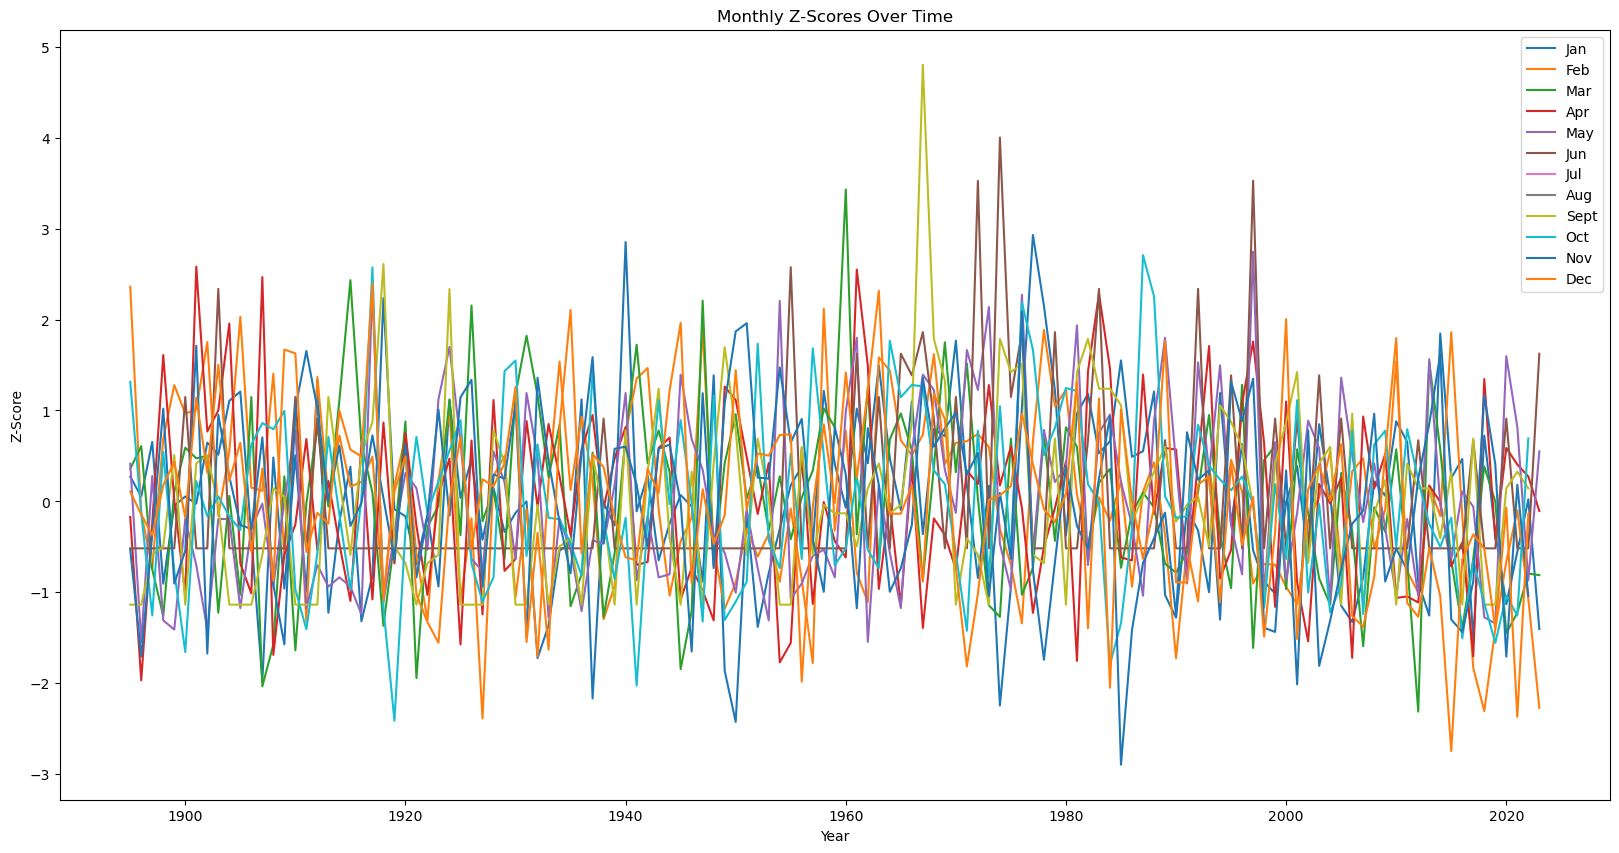

In [36]:
def plot_monthly_z_scores(df):
    plt.figure(figsize=(20, 10))
    # Assuming the exact names of the months are as listed and 'year' is correctly named
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']
    for month in months:
        plt.plot(df['year'], df[month], label = month.capitalize())
    plt.xlabel('Year')
    plt.ylabel('Z-Score')
    plt.title('Monthly Z-Scores Over Time')
    plt.legend()
    plt.show()

plot_monthly_z_scores(heater)
